# SPAM DETECTION PROJECT

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.

Spam Detector is used to detect unwanted, malicious and virus infected texts and helps to separate them from the nonspam texts. It uses a binary type of classification containing the labels such as ‘ham’ (nonspam) and spam. Application of this can be seen in Google Mail (GMAIL) where it segregates the spam emails in order to prevent them from getting into the user’s inbox.

A collection of 5573 rows SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. 

A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. 



## Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import lightgbm 
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
import scikitplot as skplt

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

import joblib

ModuleNotFoundError: No module named 'lightgbm'

## Importing the DATASET

In [2]:
spam_data=pd.read_csv(r"C:\Users\palak\Downloads\spam data.csv", encoding='latin-1')

### Checking Top 5 rows Data

In [3]:
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## EDA

### Checking Total Numbers of Rows and Column

In [4]:
spam_data.shape

(5572, 5)

### Checking All Column Name

In [5]:
spam_data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

### Checking Data Type of All Data

In [6]:
spam_data.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

### Checking for Null Values

In [7]:
spam_data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

So, we can see only there is Null values in columns:- Unnamed: 2, Unnamed: 3 and Unnamed: 4. Hence, we will drop these column.

In [8]:
#droping irrelevant column
spam_data=spam_data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
#renaming column v1 and v2 for better understanding
spam_data=spam_data.rename(columns={'v1' : 'target','v2' : 'message'})
spam_data

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Checking unique values present in the columns :

In [9]:
spam_data['target'].nunique()

2

In [10]:
spam_data['target'].unique()

array(['ham', 'spam'], dtype=object)

In [11]:
spam_data['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

## Describing Dataset

In [12]:
spam_data.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
spam_data.duplicated().sum()

403

In [14]:
spam_data.drop_duplicates(inplace = True)

# Data Visualization
## Using Countplot

ham     4516
spam     653
Name: target, dtype: int64


<AxesSubplot:xlabel='target', ylabel='count'>

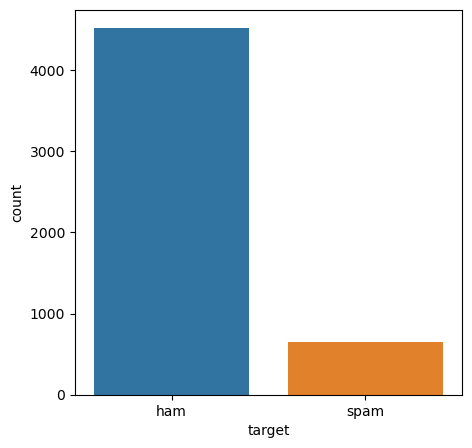

In [15]:
print(spam_data['target'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('target', data=spam_data)

## Using Pie-Plot

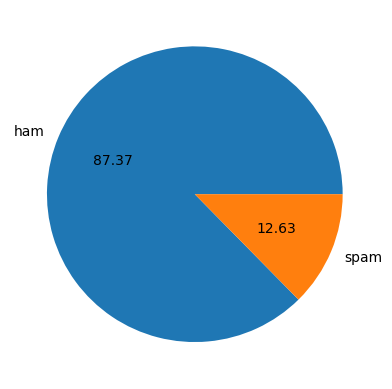

In [16]:
plt.pie(spam_data['target'].value_counts(), labels =['ham', 'spam'], autopct= "%.02f")
plt.show()

#### The above barplot and pie chart shows that our data is highly imbalanced as spam is 12.63% and ham is 87.37%.

In [19]:
# creating coloumn which will contain the no. of characters
spam_data['length'] = spam_data['message'].str.len()

In [21]:
# creating coloumn which will fetch no. of words
spam_data['num_words'] = spam_data['message'].apply(lambda x: len(nltk.word_tokenize(x)))

NameError: name 'nltk' is not defined

In [22]:
# creating coloumn which will fetch no. of sentences
spam_data['num_sent'] = spam_data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

NameError: name 'nltk' is not defined

In [23]:
spam_data.head()

,target,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# mapping labels to 1 and 0
spam_data['target'] = spam_data.target.map({'ham':0, 'spam':1})

In [ ]:
spam_data.head()

In [25]:
#describing data for all messages
spam_data[['length','num_words','num_sent']].describe()

KeyError: "['num_words', 'num_sent'] not in index"

In [ ]:
#describing data for ham messages
spam_data[spam_data['target'] == 0][['length','num_words','num_sent']].describe()

In [ ]:
#describing data for spam messages
spam_data[spam_data['target'] == 1][['length','num_words','num_sent']].describe()

In [ ]:
#plotting histogram
plt.figure(figsize=(10,5))
sns.histplot(spam_data[spam_data['target']==0]['length'])
sns.histplot(spam_data[spam_data['target']==1]['length'],color = 'red')

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(spam_data[spam_data['target']==0]['num_words'])
sns.histplot(spam_data[spam_data['target']==1]['num_words'],color = 'red')

#### These histogram are for the number of characters and words in ham and spam messages and we can clearly see that spam messages have large number of charcters and words than ham messages.

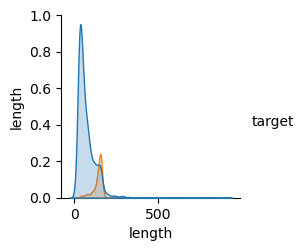

In [20]:
#pairplot for relationship between each column
sns.pairplot(spam_data, hue = 'target')

## Correlation

In [ ]:
#Using heatmap for corelations between columns 
sns.heatmap(spam_data.corr(), annot = True)

Chances of Multicolinearity will be high as there are Strong corelation between them, so we will take only one column i.e. length as it has maximum relation with the target coloumn.

# Data preprocessing

In [ ]:
ps= PorterStemmer()

In [ ]:
# defining function to apply functions: Lowercase, Tokenize, Alphanumeric, Stopwords, Stemming

def transform_text(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    y=[]
    for i in message:
        if i.isalnum():
            y.append(i)
    message = y[:]
    y.clear()
    
    for i in message:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)
            
    message = y[:]
    y.clear()
    
    for i in message:
        y.append(ps.stem(i))
        
        
    return " ".join(y)

In [ ]:
spam_data["transformed_text"] = spam_data['message'].apply(transform_text)

In [ ]:
spam_data.head()

In [ ]:
spam_data.shape

### Wordcloud

In [ ]:
wc = WordCloud(width = 500, height = 300, min_font_size= 10, background_color= 'black')

In [ ]:
#Generating Word Cloud for Spam Messages
spam_wordcloud = wc.generate(spam_data[spam_data['target']==1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(12,8))
plt.imshow(spam_wordcloud)
plt.show()

In the above Word Cloud, we can clearly see the words like text, free, reply, call, claim..etc. these words are generally seen in the SPAM Msgs.

In [ ]:
#Generating Word Cloud for Ham Messages
ham_wordcloud = wc.generate(spam_data[spam_data['target']==0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(12,8))
plt.imshow(ham_wordcloud)
plt.show()

In the above Word Cloud, we can clearly see the words like love, come, go, call, time..etc. these words are generally seen in the Ham Msgs.

### Top 30 words used in HAM and SPAM messaegs

In [ ]:
spam_corpus = []
for msg in spam_data[spam_data['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0] , pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.title("Top 30 words used in SPAM msgs")
plt.xticks(rotation = "vertical")
plt.show

In [ ]:
ham_corpus = []
for msg in spam_data[spam_data['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0] , pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.title("Top 30 words used in HAM msgs")
plt.xticks(rotation = "vertical")
plt.show

# Creating Model

In [ ]:
X=spam_data['message']
y=spam_data['target']

In [ ]:
X

In [ ]:
y

### Splitting Data into Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

In [ ]:
print (X.shape)
print (X_train.shape)
print (X_test.shape)

### CountVectorizer

In [ ]:
#Tokenization (a list of tokens), will be used as the analyzer
def process_text(text):
    
    #1 Remove Punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2 Remove Stop Words
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3 Return a list of clean words
    return clean_words

In [ ]:
# Text Vectorization
cv = CountVectorizer()

messages_bow = CountVectorizer(analyzer=process_text).fit_transform(spam_data['message'])

X=messages_bow
y=spam_data['target']

In [ ]:
#Splitting again data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20)

In [ ]:
# Defining the Classification Machine Learning Algorithms
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()
bnb = BernoulliNB()
mnb = MultinomialNB()
xgb = XGBClassifier(verbosity=0)
sgd= SGDClassifier()

# Creating a function to train and test the model with evaluation metrics
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)*100
    print(f"ACCURACY SCORE PERCENTAGE:", accuracy)
    # Confusion matrix and Classification report
    print(f"CLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
    print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
    print("-"*120)
    print("\n")

## Training and testing of all the classification algorithms

In [ ]:
for model in [lr,svc,bnb,mnb,xgb,sgd]:
    BuiltModel(model)

## Cross validation score for best score models

In [ ]:
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,X,y, cv = 5).mean()
    print("Cross validation score:", scores)
    print("\n")
    
for model in [lr,svc,bnb,mnb,xgb,sgd]:
    cross_val(model)    

##### LinearSVC is having best accuracy and cv score. So, we will use LinearSVC for model prediction.

# HyperParameter Tuning
## Linear SVC with GridSearchCV

In [ ]:
# Lets select the different parameters for tuning our best model (Linear SVC)
grid_params =  {'C':(0.001, 0.01, 0.1, 1, 10),
                   'penalty':('l1','l2'),
                  'loss':('hinge','squared_hinge')}

# Train the model with given parameters using GridSearchCV
LSVC =  GridSearchCV(svc, grid_params, cv=3)
LSVC.fit(X_train, y_train)

In [ ]:
# Selecting the best parameters found by GridSearchCV
print(LSVC.best_params_)
print(LSVC.best_score_)

In [ ]:
# Final Model with the best chosen parameters list
best_model = LinearSVC(C= 1, loss= 'squared_hinge', penalty= 'l2')
best_model.fit(X_train,y_train) # fitting data to the best model
pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

In [ ]:
# Creating a normalized confusion matrix here
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)

#### So the best accuracy score is 98.

### Saving the Model

In [ ]:
joblib.dump(best_model, "Email_Spam_Detection_Classifier.pkl")

### Best Model  

In [ ]:
Model = joblib.load("Email_Spam_Detection_Classifier.pkl")
# Predicting test data using loaded model
prediction = Model.predict(X_test)
# Analysing Predicted vs Actual results
Email_Spam_Detection_Classifier = pd.DataFrame()
Email_Spam_Detection_Classifier['Predicted Spam Messages Detection'] = prediction
Email_Spam_Detection_Classifier['Actual Spam Messages Detection'] = y
Email_Spam_Detection_Classifier

In [ ]:
# Converting the dataframe into CSV format and saving it
Email_Spam_Detection_Classifier.to_csv('Email_Spam_Detection_Classifier.csv', index=False)

#### Final Remarks:
After applying the hyper parameter tuning the best accuracy score obtained was 98.06651198762569% which can be further improved by obtaining more data and working up through other parameter combinations.